In [1]:
import numpy as np
import matplotlib.pyplot as plt
from worldModels import *
import scipy.io
import os.path
from utils import *
from run_simulations import *
from decoding import *
from agents import *
from sklearn import svm
import pickle
from tqdm import tqdm
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
from sklearn.linear_model import LinearRegression


%matplotlib notebook
%reload_ext autoreload
%autoreload 2

## Repeated simulations of Q-learning and inference-based behavior 

### Q-learning

In [72]:
# Get metrics for all points in the Qspace
N = 11
gammalst = np.linspace(0.01, 1.4, N)
epslst = np.linspace(0.01, 0.5, N)

Qeff_arr = np.zeros((N, N, 50)) * np.nan
Qlapse_arr = np.zeros((N, N, 50)) * np.nan
Qoffset_arr = np.zeros((N, N, 50)) * np.nan
Qslope_arr = np.zeros((N, N, 50)) * np.nan


for idgamma, gamma in enumerate(gammalst):
    for ideps, eps in enumerate(epslst):
        print(gamma, eps)
        metrics = get_Qmetrics(gamma, eps)
        Qeff_arr[idgamma, ideps, :] = metrics[0]
        Qlapse_arr[idgamma, ideps, :] = metrics[1]
        Qoffset_arr[idgamma, ideps, :] = metrics[2]
        Qslope_arr[idgamma, ideps, :] = metrics[3]
        

0.01 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


KeyboardInterrupt: 

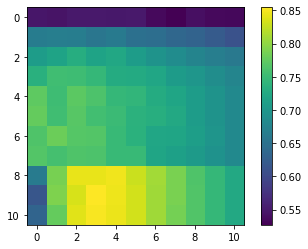

In [50]:
plt.imshow(np.nanmean(Qeff_arr, axis=2))
plt.colorbar()

### Inference-based

In [51]:
# Get metrics for all points in the IB space
prewlst = np.linspace(0.55, 0.99, N)
pswitchlst = np.linspace(0.01, 0.45, N)

IBeff_arr = np.zeros((N, N, 50)) * np.nan
IBlapse_arr = np.zeros((N, N, 50)) * np.nan
IBoffset_arr = np.zeros((N, N, 50)) * np.nan
IBslope_arr = np.zeros((N, N, 50)) * np.nan


for idr, prew in enumerate(prewlst):
    for ids, pswitch in enumerate(pswitchlst):
        print(prew, pswitch)
        metrics = get_IB_metrics(pswitch, prew)
        IBeff_arr[idr, ids, :] = metrics[0]
        IBlapse_arr[idr, ids, :] = metrics[1]
        IBoffset_arr[idr, ids, :] = metrics[2]
        IBslope_arr[idr, ids, :] = metrics[3]
        

0.55 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.55 0.054
0.55 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.55 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.55 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.55 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.55 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.55 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.55 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.55 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.55 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.5940000000000001 0.01
0.5940000000000001 0.054


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)


0.5940000000000001 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.5940000000000001 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.5940000000000001 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.5940000000000001 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.5940000000000001 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.5940000000000001 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.5940000000000001 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.5940000000000001 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.5940000000000001 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.638 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.638 0.054


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)


0.638 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.638 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.638 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.638 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.638 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.638 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.638 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.638 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.638 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:155: RuntimeWarning: Mean of empty slice
  rightAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:152: RuntimeWarning: Mean of empty slice
  rightAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.054


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.682 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.726 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)


0.726 0.054


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.726 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.726 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.726 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.726 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.726 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.726 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.726 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.726 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.726 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.77 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)


0.77 0.054


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.77 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.77 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.77 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.77 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.77 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.77 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.77 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.77 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.77 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.054


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8140000000000001 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.054


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.8580000000000001 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.054


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.902 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:151: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[1::2, :], axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.054


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.946 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.054


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.09799999999999999


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.14200000000000002


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.186


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.22999999999999998


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.274


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.318


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.362


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.40599999999999997


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


0.99 0.45


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:156: RuntimeWarning: Mean of empty slice
  leftAverage = np.nanmean(choicelst[::2, :], axis=0)


### Decoding
Here, we will try to use SVM to decode the behavior of Q-learning from inference-based.
We pick pairs of parameter sets, one from Q-learning and one from inference-based, to do the decoding

In [2]:
# SVM decode
decoding_perf = np.zeros((len(gammalst), len(epslst), len(prewlst), len(pswitchlst)))
coefs_all0 = np.zeros((len(gammalst), len(epslst), len(prewlst), len(pswitchlst)))
coefs_all1 = np.zeros((len(gammalst), len(epslst), len(prewlst), len(pswitchlst)))
coefs_all2 = np.zeros((len(gammalst), len(epslst), len(prewlst), len(pswitchlst)))
coefs_all3 = np.zeros((len(gammalst), len(epslst), len(prewlst), len(pswitchlst)))

for idgamma, gamma in enumerate(gammalst):
    for ideps, eps in enumerate(epslst):
        for idr, pr in enumerate(prewlst):
            for ids, ps in enumerate(pswitchlst):
                Qmetrics = [Qeff_arr[idgamma, ideps], Qlapse_arr[idgamma, ideps], 
                            Qoffset_arr[idgamma, ideps], Qslope_arr[idgamma, ideps]]
                IBmetrics = [IBeff_arr[idr, ids], IBlapse_arr[idr, ids], 
                            IBoffset_arr[idr, ids], IBslope_arr[idr, ids]]
                perf, coefs = fit_and_evaluate_svm(Qmetrics, IBmetrics)
                decoding_perf[idgamma, ideps, idr, ids] = perf
                coefs_all0[idgamma, ideps, idr, ids] = coefs[0][0]
                coefs_all1[idgamma, ideps, idr, ids] = coefs[0][1]
                coefs_all2[idgamma, ideps, idr, ids] = coefs[0][2]
                coefs_all3[idgamma, ideps, idr, ids] = coefs[0][3]



NameError: name 'gammalst' is not defined

In [57]:
sim_obj = {'Qeff_arr': Qeff_arr, 'Qlapse_arr': Qlapse_arr, 'Qoffset_arr': Qoffset_arr, 
          'Qslope_arr': Qslope_arr, 'IBeff_arr': IBeff_arr, 'IBlapse_arr': IBlapse_arr,
          'IBslope_arr': IBslope_arr, 'IBoffset_arr': IBoffset_arr,
          'coefs0': coefs_all0, 'coefs1': coefs_all1, 'coefs2': coefs_all2,
                                   'coefs3': coefs_all3, 'decoding_perf': decoding_perf,
                                   'prewlst': prewlst, 'pswitchlst': pswitchlst, 'gammalst': gammalst,
                                   'epslst': epslst, 'order': ['gamma', 'eps', 'pr', 'ps']}
with open('svmclassifier.pickle', 'wb') as f:
    pickle.dump(sim_obj, f)

In [6]:
scipy.io.savemat('svmresults2.mat', {'coefs0': coefs_all0, 'coefs1': coefs_all1, 'coefs2': coefs_all2,
                                   'coefs3': coefs_all3, 'decoding_perf': decoding_perf,
                                   'prewlst': prewlst, 'pswitchlst': pswitchlst, 'gammalst': gammalst,
                                   'epslst': epslst, 'order': ['gamma', 'eps', 'pr', 'ps']})

## Behavioral session decoding

In [3]:
# Load the behavior
data = scipy.io.loadmat('f01_all_sessions.mat')

# Load the simulation results
with open('svmclassifier.pickle', 'rb') as f:
    sim_obj = pickle.load(f)


# expdata = {'alltargets': data['targets_cell'][0][69], 
#            'allchoices': data['choices_cell'][0][69]}
# pR, pL, _, eff = find_experiment_metrics(expdata, window=20)

eff_arr_all = np.vstack([sim_obj['Qeff_arr'], sim_obj['IBeff_arr']])
lapse_arr_all = np.vstack([sim_obj['Qlapse_arr'], sim_obj['IBlapse_arr']])
offset_arr_all = np.vstack([sim_obj['Qoffset_arr'], sim_obj['IBoffset_arr']])
slope_arr_all = np.vstack([sim_obj['Qslope_arr'], sim_obj['IBslope_arr']])

# Qdistance, IBdistance = find_Q_IB_distance([eff, pL], [eff_arr_all,
#                     lapse_arr_all, offset_arr_all, slope_arr_all])


In [5]:
# Fitting for all files
qpos_all = []
ibpos_all = []

pL_all = []
pR_all = []
eff_all = []


for i in tqdm(range(29)): #tqdm(range(len(data['targets_cell'][0]))):
#     print(i)
    expdata = {'alltargets': data['targets_cell'][0][i], 
           'allchoices': data['choices_cell'][0][i]}
    
    if len(expdata['alltargets']) == 0 or len(np.unique(expdata['alltargets'])) == 1:
        qpos_all.append([-1, -1])
        ibpos_all.append([-1, -1])
        pL_all.append([np.nan] * 3)
        pR_all.append([np.nan] * 3)
        eff_all.append(np.nan)
    else:
        pR, pL, choicelst, eff = find_experiment_metrics(expdata, window=20, type='doublesigmoid')
        pL_all.append(pL)
        pR_all.append(pR)
        eff_all.append(eff)

#         Qdistance, IBdistance, expeff, expl, expo, exps = find_Q_IB_ave_distance([eff, pL], [eff_arr_all,
#                             lapse_arr_all, offset_arr_all, slope_arr_all])
        Qdistance, IBdistance = find_Q_IB_zdistance([eff, [pL[0], pL[0], pL[1]]], [eff_arr_all,
                            lapse_arr_all, offset_arr_all, slope_arr_all])
        qpos = [np.where(Qdistance == np.nanmin(Qdistance))[0][0],
           np.where(Qdistance == np.nanmin(Qdistance))[1][0]]
        ibpos = [np.where(IBdistance == np.nanmin(IBdistance))[0][0],
                np.where(IBdistance == np.nanmin(IBdistance))[1][0]]

        qpos_all.append(qpos)
        ibpos_all.append(ibpos)
    
    
    

  0%|          | 0/29 [00:00<?, ?it/s]/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/decoding.py:195: RuntimeWarning: invalid value encountered in true_divide
  lapse_norm = (expmetrics[1][2] - np.nanmean(QIBmetrics[1], axis=2)) / np.nanstd(QIBmetrics[1], axis=2)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/decoding.py:195: RuntimeWarning: divide by zero encountered in true_divide
  lapse_norm = (expmetrics[1][2] - np.nanmean(QIBmetrics[1], axis=2)) / np.nanstd(QIBmetrics[1], axis=2)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/utils.py:297: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
100%|██████████| 29/29 [00:00<00:00, 48.11it/s]


<IPython.core.display.Javascript object>


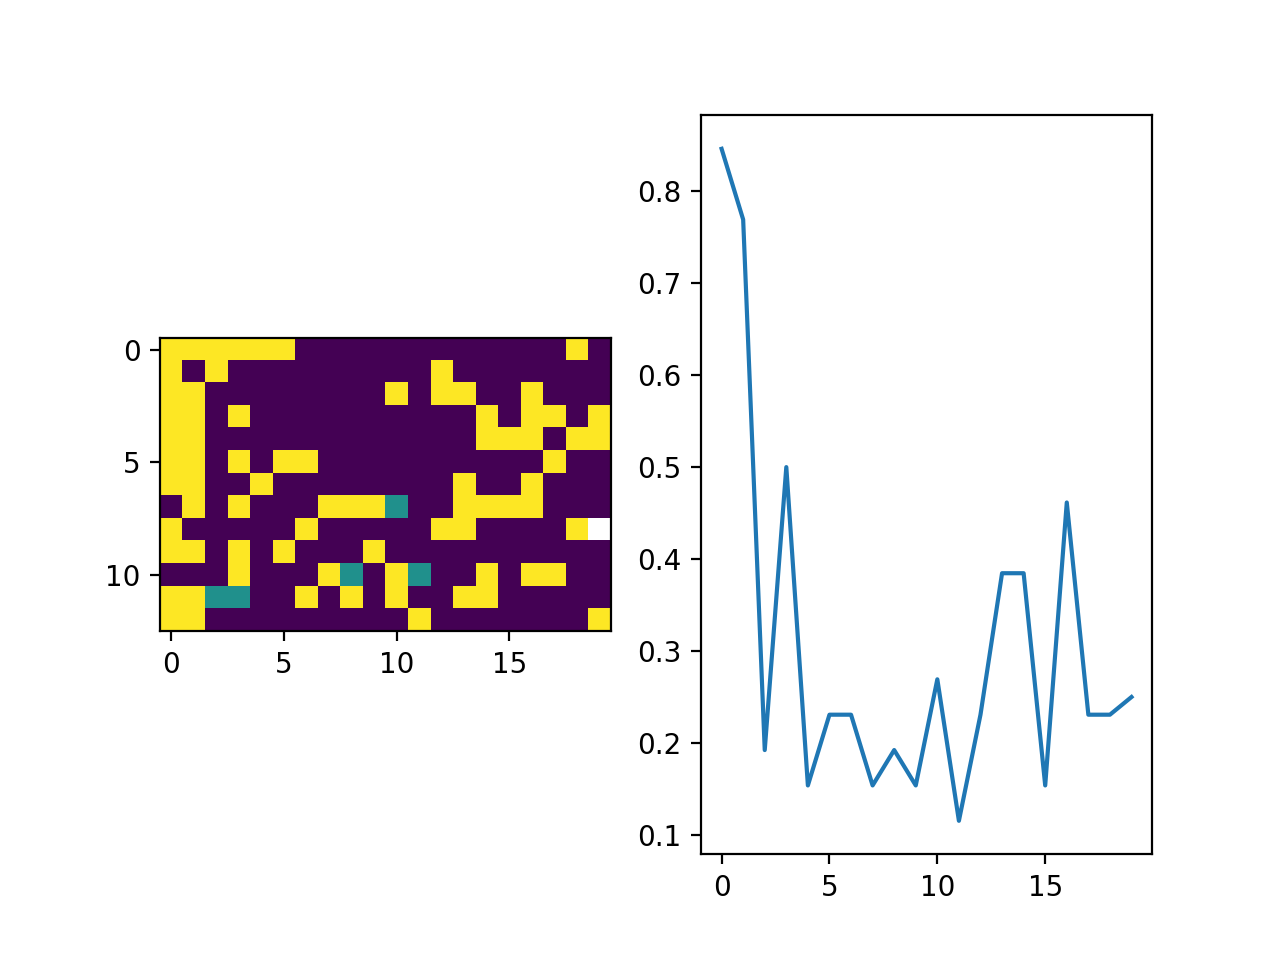

In [6]:
plt.figure()
plt.subplot(121)
plt.imshow(choicelst[1::2,:])

plt.subplot(122)
plt.plot(np.nanmean(choicelst[1::2,:], axis=0))

In [7]:
type = 'doublesigmoid'
if type == 'sigmoid':
    evalfun = predict_sigmoid
else:
    evalfun = exp_fun2
@interact(i=(0, 100))
def explore_data(i=20):
    expdata = {'alltargets': data['targets_cell'][0][i], 
               'allchoices': data['choices_cell'][0][i]}

    first_side=1-expdata['alltargets'][0][0]
    pR, pL, choicelst, eff = find_experiment_metrics(expdata, window=20, type=type)
    print('nblocks:', choicelst.shape[0])
    print('slope, offset L, lapse low', pL)
    print('slope, offset R, lapse high', pR)
    plt.figure()
    plt.subplot(122)
    xvals = np.arange(choicelst.shape[1])

    if type == 'sigmoid':
        plt.plot(1-np.nanmean(1 - choicelst[first_side::2,:], axis=0))
    elif type == 'exponential':
        plt.plot(np.nanmean(1 - choicelst[first_side::2,:], axis=0))
    elif type == 'doublesigmoid':
        predR = predict_doublesigmoid(xvals, [pR[0], pR[1], pL[2], pR[2]])
        plt.plot(np.nanmean(choicelst[1-first_side::2,:], axis=0))
        plt.plot(1-predR)
    plt.ylim([0, 1])
    plt.title('Right fit')

    plt.subplot(121)
    plt.plot(np.nanmean(choicelst[first_side::2,:], axis=0))
    if type == 'doublesigmoid':
        predL = predict_doublesigmoid(xvals, [pL[0], pL[1], pR[2], pL[2]])
        plt.plot(xvals, predL)

#     ypred = evalfun(xvals, pL)
    plt.ylim([0, 1])
    plt.title('Left fit')


interactive(children=(IntSlider(value=20, description='i'), Output()), _dom_classes=('widget-interact',))

<ipython-input-8-f75dc010dcc4>:12: RuntimeWarning: Mean of empty slice
  meanoffsets = np.nanmean(-offsets, axis=0)[9:]
<ipython-input-8-f75dc010dcc4>:13: RuntimeWarning: All-NaN slice encountered
  maxlapses = np.nanmax(lapses, axis=0)[9:]


<IPython.core.display.Javascript object>


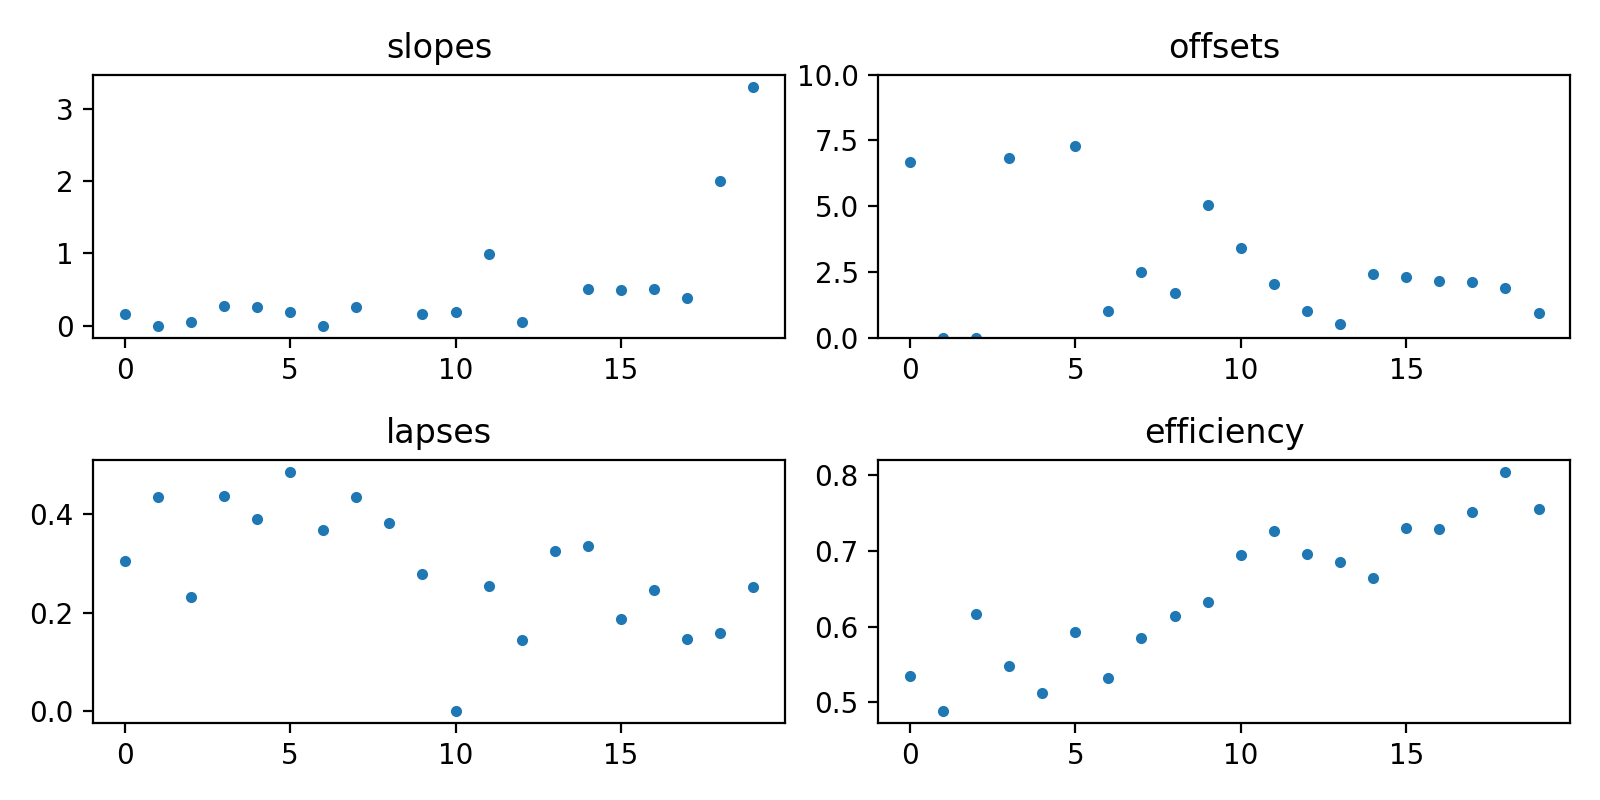

In [8]:
pL_all = np.array(pL_all)
pR_all = np.array(pR_all)
eff_all = np.array(eff_all)
slopes = np.vstack([pL_all[:,0], pR_all[:,0]])
offsets = np.vstack([pL_all[:,1], pR_all[:,1]])
lapses = np.vstack([pL_all[:,2], pR_all[:,2]])

eff_all = eff_all[9:]
minslopes = np.min(-slopes, axis=0)[9:]
minslopes[minslopes > 5] = np.nan

meanoffsets = np.nanmean(-offsets, axis=0)[9:]
maxlapses = np.nanmax(lapses, axis=0)[9:]

plt.figure(figsize=(8,4))
plt.subplot(221)
plt.plot(minslopes, '.')
plt.title('slopes')

plt.subplot(222)
plt.plot(meanoffsets, '.')
plt.ylim([0, 10])
plt.title('offsets')

plt.subplot(223)
plt.plot(maxlapses, '.')
plt.title('lapses')
# plt.ylim([0, 10])

plt.subplot(224)
plt.plot(eff_all, '.')
plt.title('efficiency')
plt.tight_layout()

In [9]:
# Curve fitting for slopes, offsets and lapses
xvalspred = np.arange(len(minslopes))
# slopes
xfitvalsS = np.arange(len(minslopes)).reshape((-1, 1))
xfitvalsS = xfitvalsS[(~np.isnan(minslopes)) & (minslopes > 0)]
yfitvalsS = np.log(minslopes[(~np.isnan(minslopes)) & (minslopes > 0)])
regS = LinearRegression().fit(xfitvalsS, yfitvalsS)
predS = np.exp(xvalspred * regS.coef_[0] + regS.intercept_)

# offsets
xfitvalsO = np.arange(len(meanoffsets)).reshape((-1, 1))
xfitvalsO = xfitvalsO[(~np.isnan(meanoffsets)) & (meanoffsets > 0)]
yfitvalsO = np.log(meanoffsets[(~np.isnan(meanoffsets)) & (meanoffsets > 0)])
regO = LinearRegression().fit(xfitvalsO, yfitvalsO)
predO = np.exp(xvalspred * regO.coef_[0] + regO.intercept_)

# lapses
xfitvalsL = np.arange(len(maxlapses)).reshape((-1, 1))
xfitvalsL = xfitvalsL[(~np.isnan(maxlapses)) & (maxlapses > 0)]
yfitvalsL = np.log(maxlapses[(~np.isnan(maxlapses)) & (maxlapses > 0)])
regL = LinearRegression().fit(xfitvalsL, yfitvalsL)
predL = np.exp(xvalspred * regL.coef_[0] + regL.intercept_)

# efficiencies
xfitvalsE = np.arange(len(eff_all)).reshape((-1,1))
yfitvalsE = eff_all.reshape((-1,1))
regE = LinearRegression().fit(xfitvalsE, yfitvalsE)
predE = xvalspred * regE.coef_[0] + regE.intercept_




<IPython.core.display.Javascript object>


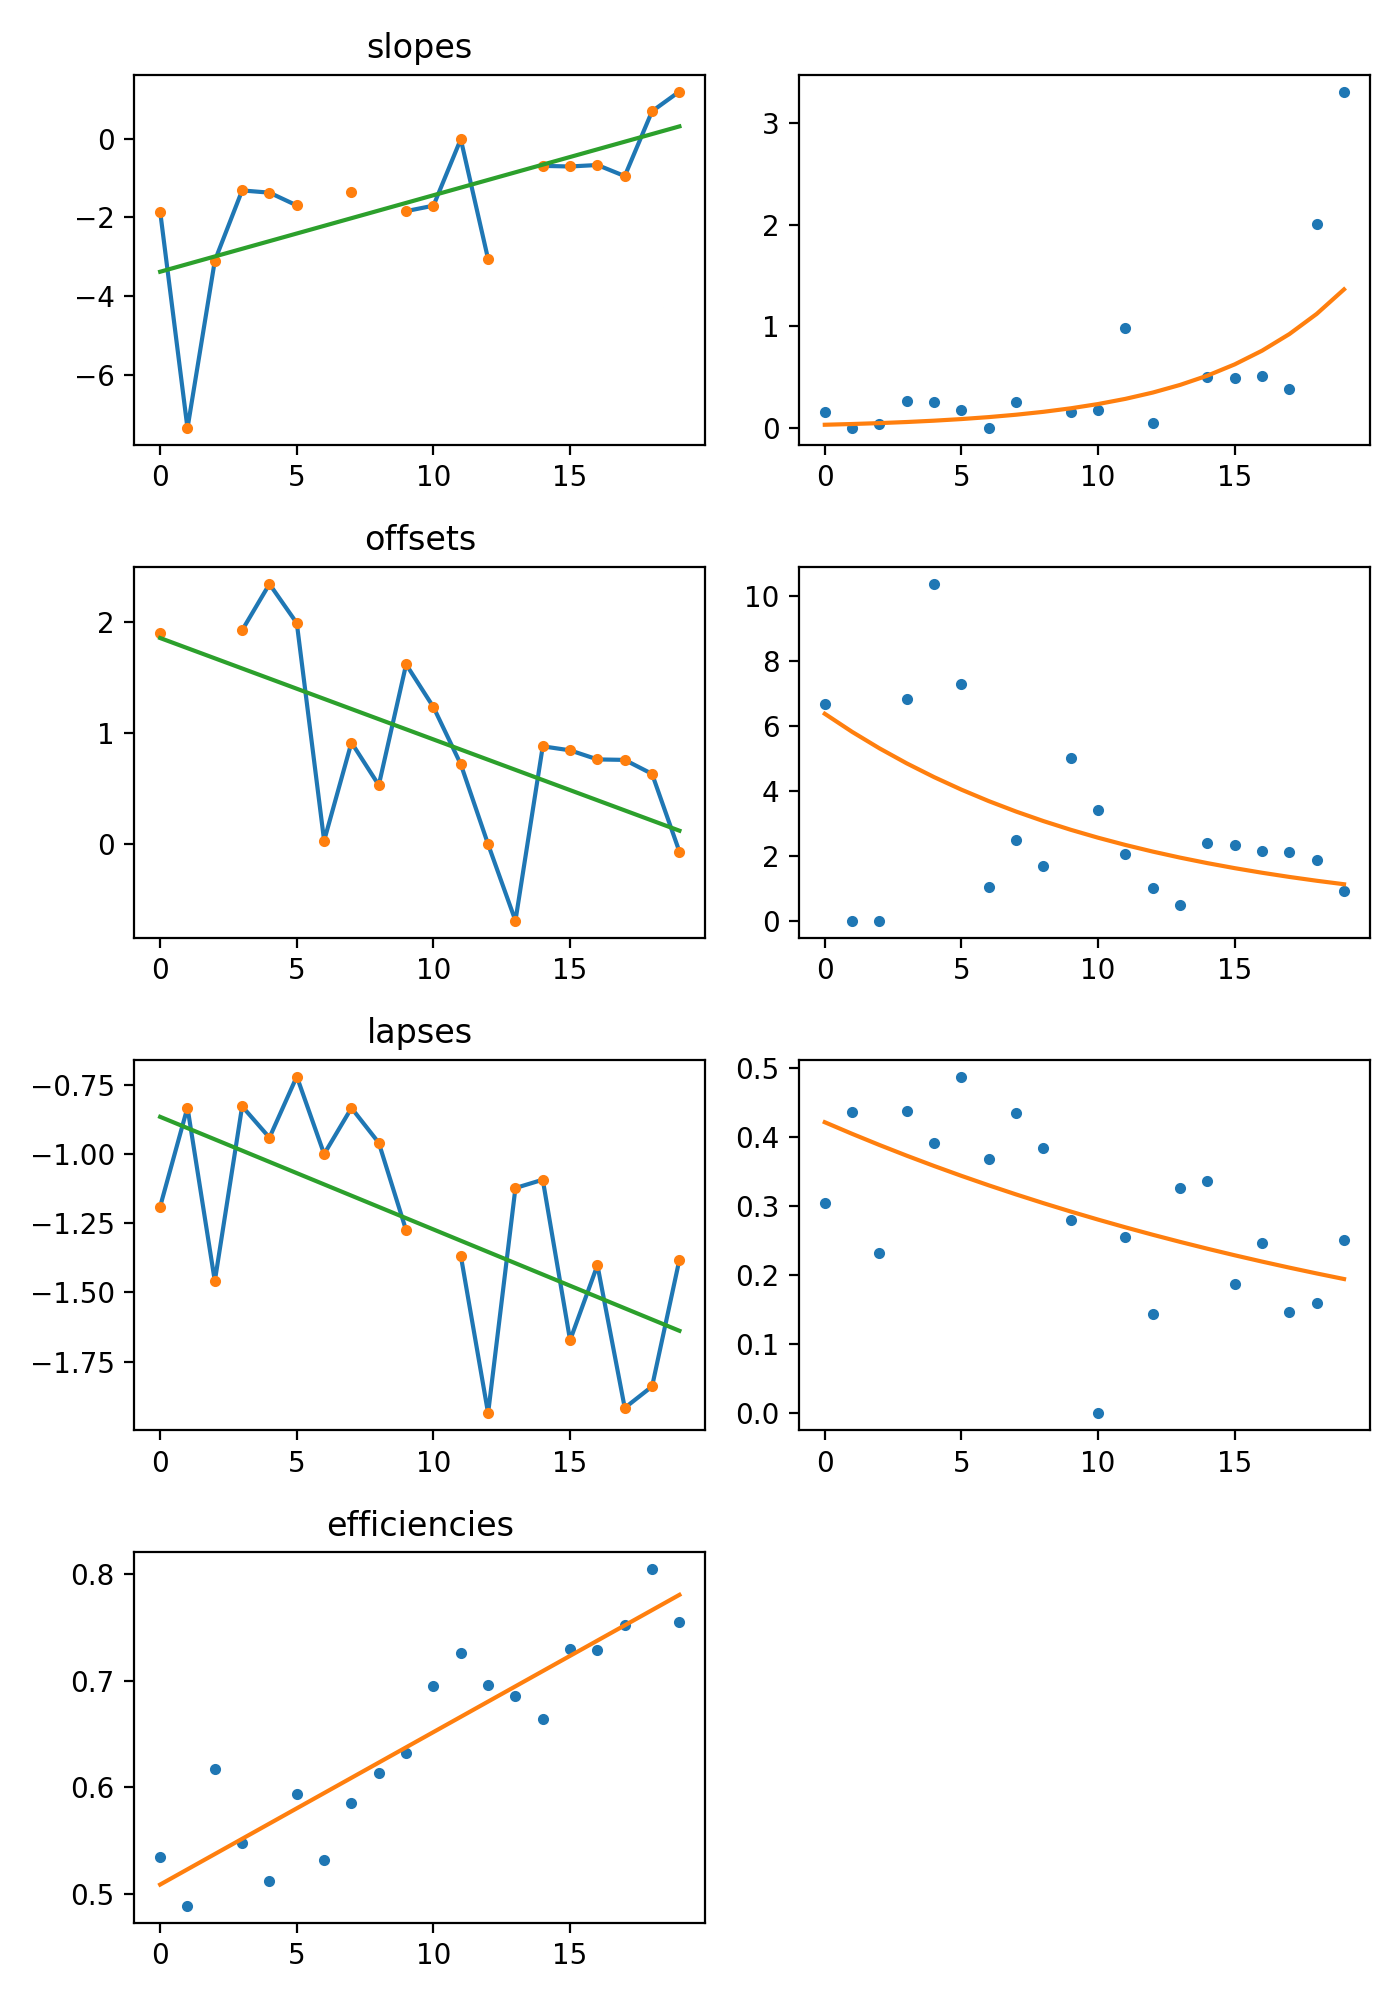

<ipython-input-10-fdaf9db10df5>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(minslopes))
<ipython-input-10-fdaf9db10df5>:13: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(meanoffsets))
<ipython-input-10-fdaf9db10df5>:24: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(maxlapses))


In [10]:
plt.figure(figsize=(7,10))
plt.subplot(421)
plt.plot(np.log(minslopes))
plt.plot(xfitvalsS, yfitvalsS, '.')
plt.plot(xfitvalsS, xfitvalsS * regS.coef_[0] + regS.intercept_)
plt.title('slopes')

plt.subplot(422)
plt.plot(minslopes, '.')
plt.plot(xvalspred, predS)

plt.subplot(423)
plt.plot(np.log(meanoffsets))
plt.plot(xfitvalsO, yfitvalsO, '.')
plt.plot(xfitvalsO, xfitvalsO * regO.coef_[0] + regO.intercept_)
plt.title('offsets')

plt.subplot(424)
plt.plot(meanoffsets, '.')
plt.plot(xvalspred, predO)


plt.subplot(425)
plt.plot(np.log(maxlapses))
plt.plot(xfitvalsL, yfitvalsL, '.')
plt.plot(xfitvalsL, xfitvalsL * regL.coef_[0] + regL.intercept_)
plt.title('lapses')

plt.subplot(426)
plt.plot(maxlapses, '.')
plt.plot(xvalspred, predL)

plt.subplot(427)
# plt.plot(np.log(maxlapses))
# plt.plot(xfitvalsL, yfitvalsL, '.')
# plt.plot(xfitvalsL, xfitvalsL * regL.coef_[0] + regL.intercept_)

# plt.subplot(428)
plt.plot(eff_all, '.')
plt.plot(xvalspred, predE)
plt.title('efficiencies')
plt.tight_layout()

In [67]:
# compute Q- and IB- distance
qpos_all, ibpos_all = [], []
for i in range(len(predO)):
    Qdistance, IBdistance = find_Q_IB_zdistance((predE[i], [predS[i], -predO[i], predL[i]]), [eff_arr_all,
                            lapse_arr_all, offset_arr_all, slope_arr_all])
    
    qpos = [np.where(Qdistance == np.nanmin(Qdistance))[0][0],
       np.where(Qdistance == np.nanmin(Qdistance))[1][0]]
    ibpos = [np.where(IBdistance == np.nanmin(IBdistance))[0][0],
            np.where(IBdistance == np.nanmin(IBdistance))[1][0]]

    qpos_all.append(qpos)
    ibpos_all.append(ibpos)

<IPython.core.display.Javascript object>


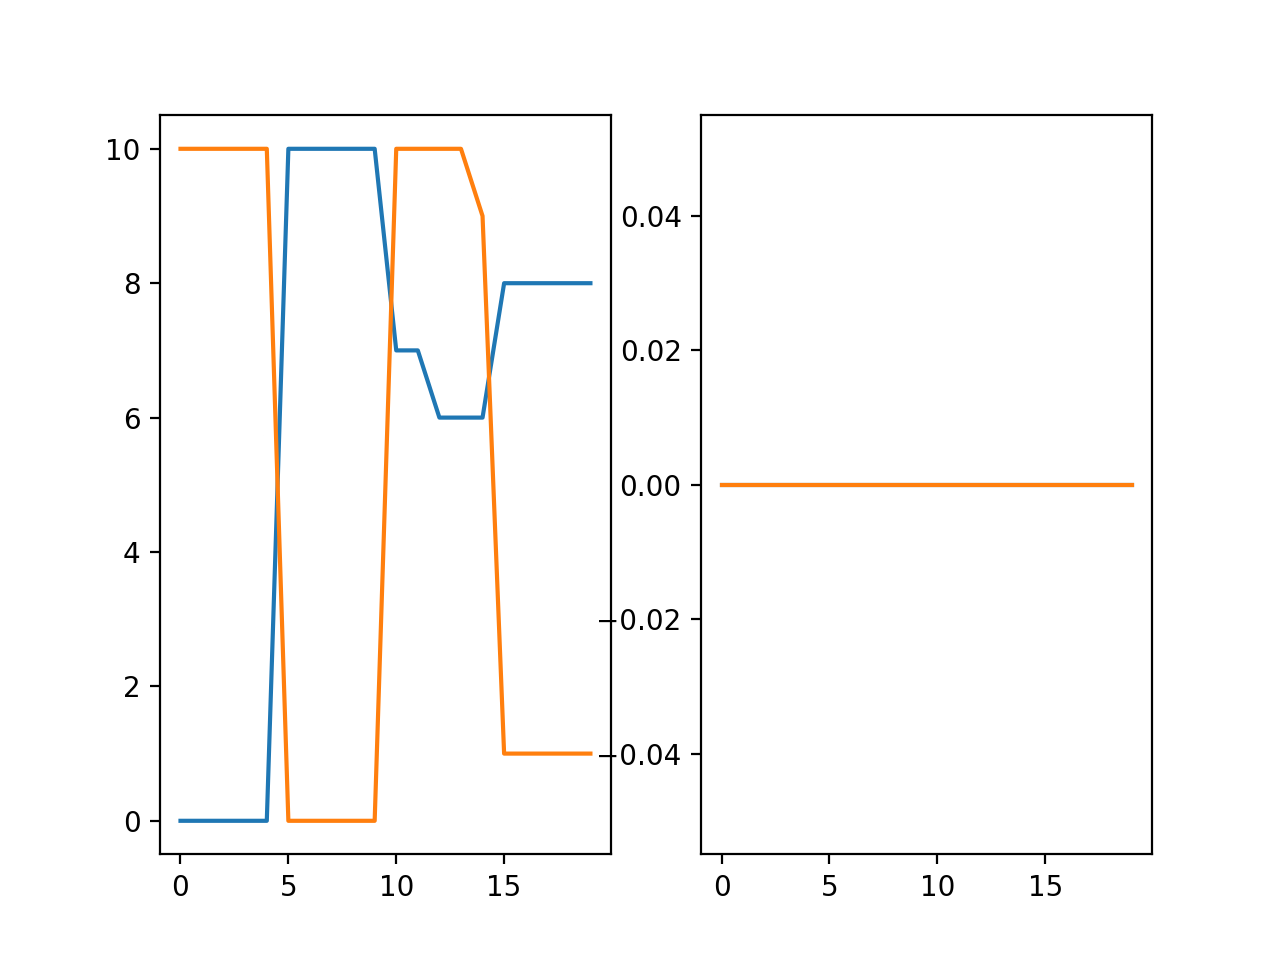

In [68]:
plt.figure()
plt.subplot(121)
plt.plot(np.array(qpos_all))

plt.subplot(122)
plt.plot(np.array(ibpos_all))

<IPython.core.display.Javascript object>


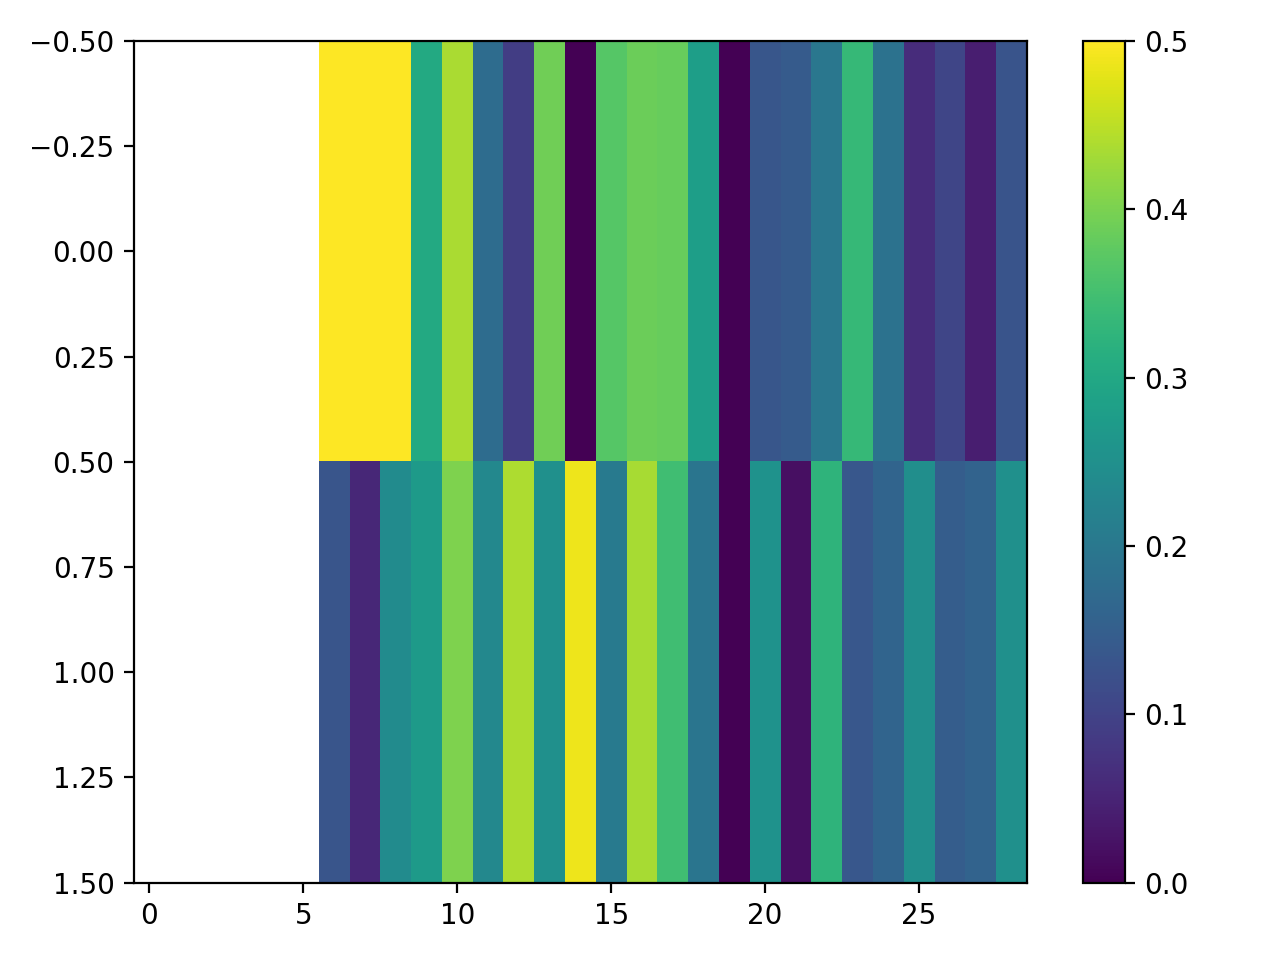

In [13]:
plt.figure()
plt.imshow(lapses, aspect='auto')
plt.colorbar()
plt.tight_layout()

In [53]:
id = 15
Qdistance, IBdistance = find_Q_IB_zdistance((predE[id], [predS[id], predO[id], predL[id]]), [eff_arr_all,
                            lapse_arr_all, offset_arr_all, slope_arr_all])

<IPython.core.display.Javascript object>


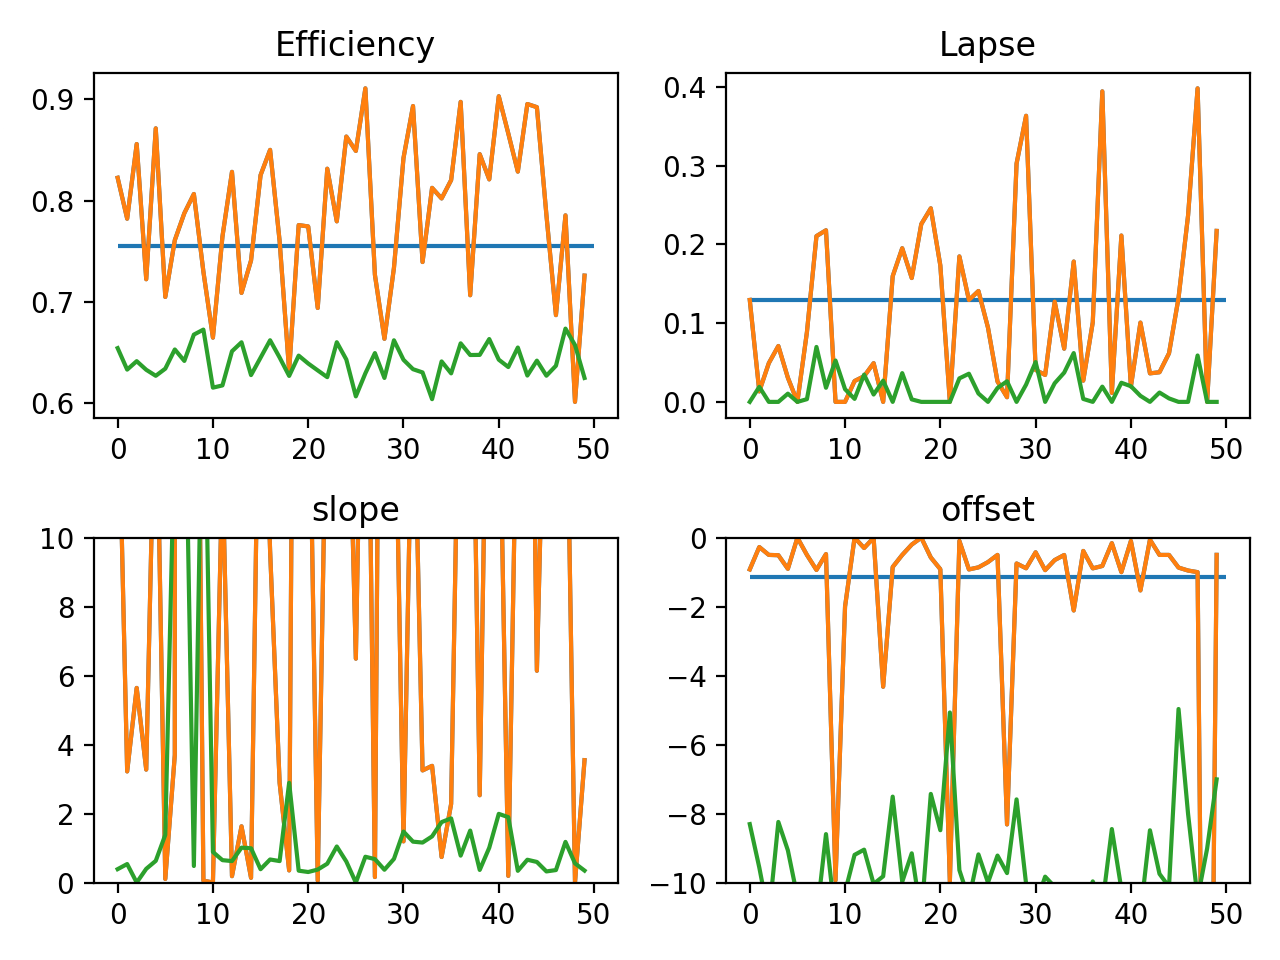

In [54]:
plt.figure()
plt.imshow(Qdistance, vmin=0, vmax=1000)
plt.colorbar()

<IPython.core.display.Javascript object>


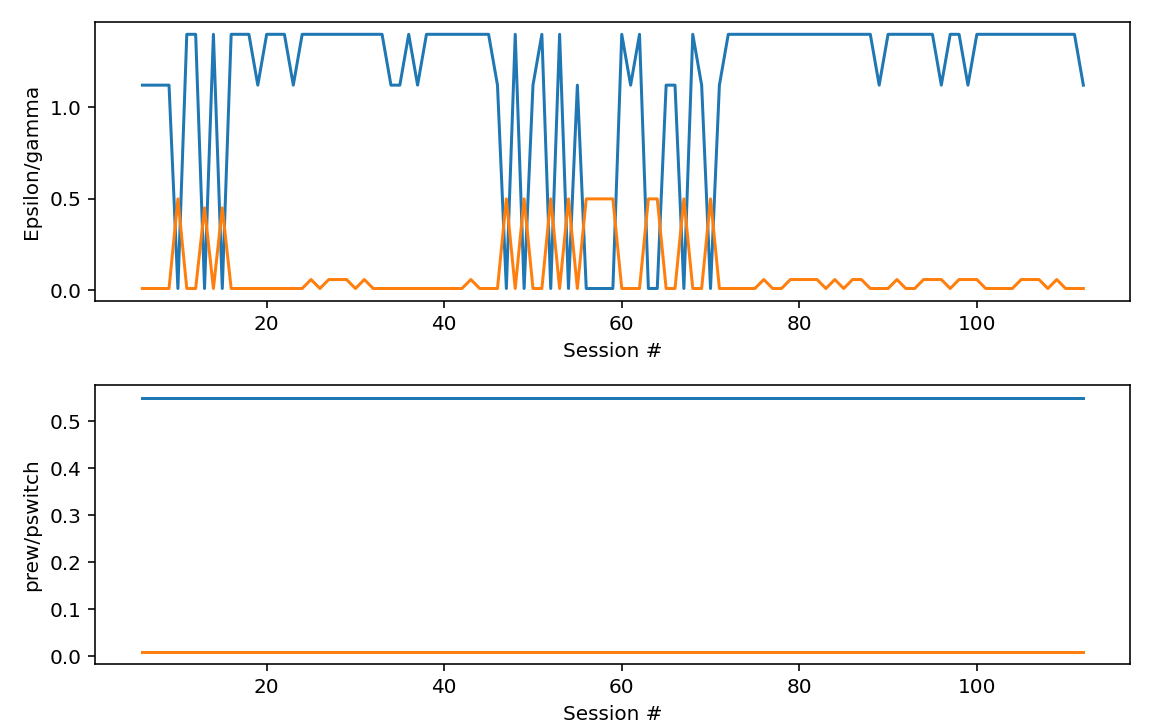

Text(45.125, 0.5, 'prew/pswitch')

In [157]:
plt.figure(figsize=(8,5))
qpos_filt = np.array(qpos_all) #shape is (gamma, eps)
gammamax = sim_obj['gammalst'][qpos_filt[:,0]]
gammamax[qpos_filt[:,0] < 0] = np.nan
epsmax = sim_obj['epslst'][qpos_filt[:,1]]
epsmax[qpos_filt[:,1] < 0] = np.nan

ibpos_filt = np.array(ibpos_all)
prewmax = sim_obj['prewlst'][ibpos_filt[:,0]]
prewmax[ibpos_filt[:,0] < 0] = np.nan
pswmax = sim_obj['pswitchlst'][ibpos_filt[:,1]]
pswmax[ibpos_filt[:,1] < 0] = np.nan


plt.subplot(211)
plt.plot(gammamax)
plt.plot(epsmax)

plt.xlabel('Session #')
plt.ylabel('Epsilon/gamma')

plt.subplot(212)
# plt.plot(qpos_all)
plt.plot(prewmax)
plt.plot(pswmax)
plt.tight_layout()
plt.xlabel('Session #')
plt.ylabel('prew/pswitch')

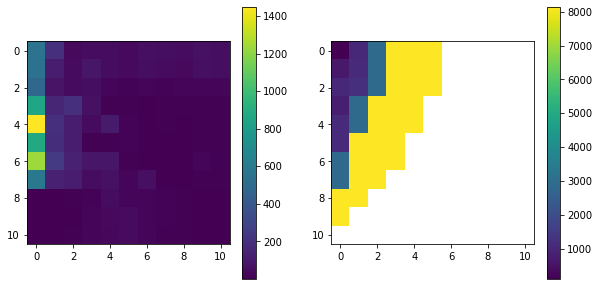

In [64]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(Qdistance2)
plt.colorbar()

plt.subplot(122)
plt.imshow(IBdistance2)
plt.colorbar()

In [7]:
Qdistance[5,6]

0.27728694866150794

In [8]:
Qdistance[9,1]

0.40704838169423135

<IPython.core.display.Javascript object>


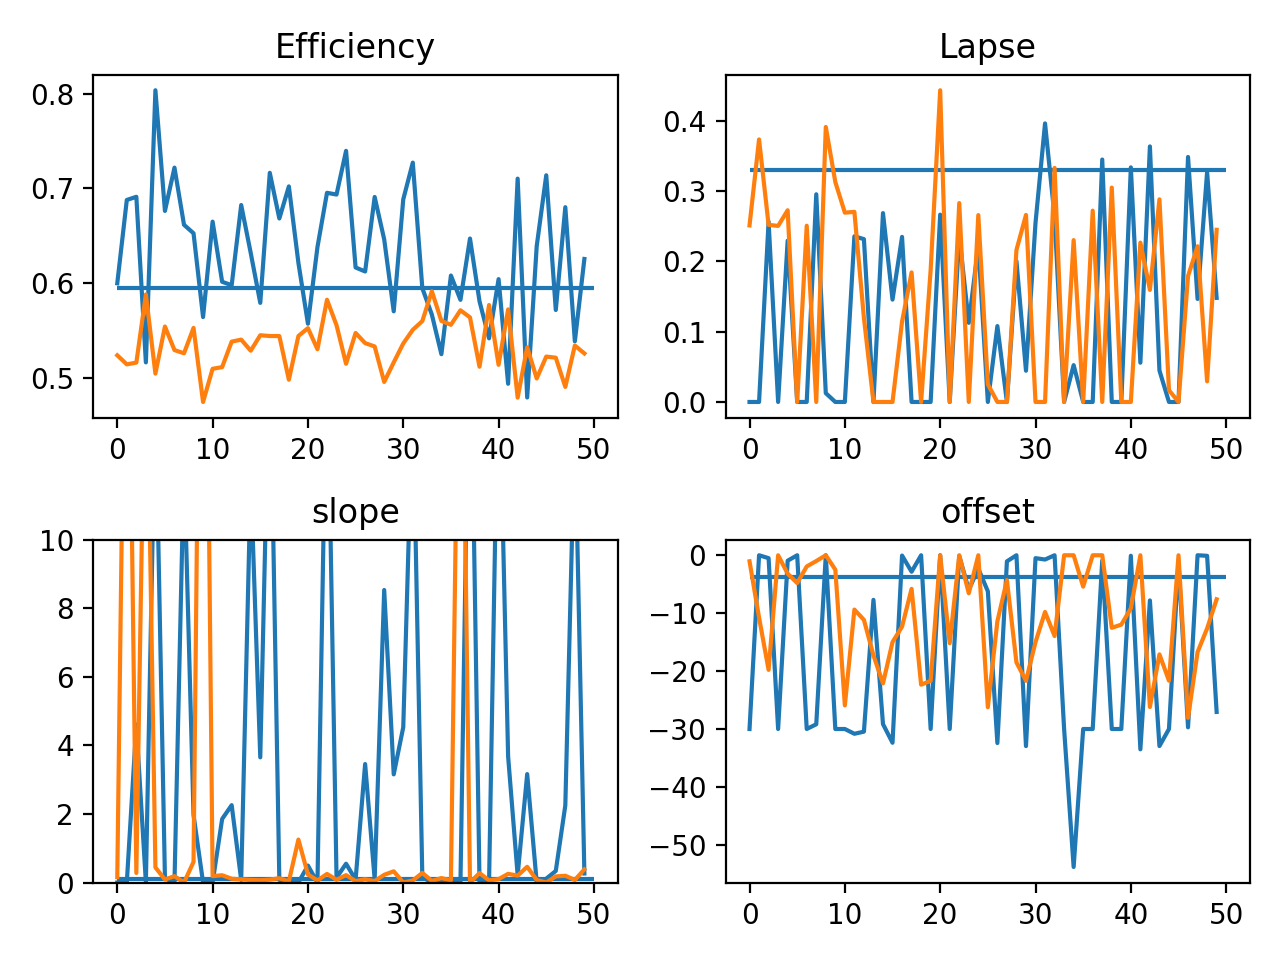

qpos =  [10, 0] . ibpos = [0, 0]


In [74]:
id = 6
Qdistance, IBdistance = find_Q_IB_zdistance((predE[id], [predS[id], -predO[id], predL[id]]), [eff_arr_all,
                            lapse_arr_all, offset_arr_all, slope_arr_all])

plt.figure()
refpoint = [0, 10]
qpos = [np.where(Qdistance == np.min(Qdistance))[0][0],
       np.where(Qdistance == np.min(Qdistance))[1][0]]
# qpos = [9,1]
ibpos = [np.where(IBdistance == np.min(IBdistance))[0][0],
        np.where(IBdistance == np.min(IBdistance))[1][0]]
print('qpos = ', qpos, '. ibpos =', ibpos)
plt.subplot(221)
plt.plot(sim_obj['Qeff_arr'][qpos[0], qpos[1]])
plt.plot(sim_obj['Qeff_arr'][refpoint[0], refpoint[1]])
# plt.plot(sim_obj['IBeff_arr'][ibpos[0], ibpos[1]])
plt.title('Efficiency')
plt.hlines(predE[id], 0, 50)

plt.subplot(222)
plt.plot(sim_obj['Qlapse_arr'][qpos[0], qpos[1]])
plt.plot(sim_obj['Qlapse_arr'][refpoint[0], refpoint[1]])
# plt.plot(sim_obj['IBlapse_arr'][ibpos[0], ibpos[1]])
plt.title('Lapse')
plt.hlines(predL[id], 0, 50)


plt.subplot(223)
plt.plot(sim_obj['Qslope_arr'][qpos[0], qpos[1]])
plt.plot(sim_obj['Qslope_arr'][refpoint[0], refpoint[1]])
# plt.plot(sim_obj['IBslope_arr'][ibpos[0], ibpos[1]])
plt.title('slope')
plt.ylim([0,10])
plt.hlines(predS[id], 0, 50)


plt.subplot(224)
plt.plot(sim_obj['Qoffset_arr'][qpos[0], qpos[1]])
plt.plot(sim_obj['Qoffset_arr'][refpoint[0], refpoint[1]])
# plt.plot(sim_obj['IBoffset_arr'][ibpos[0], ibpos[1]])
plt.title('offset')
plt.hlines(-predO[id], 0, 50)
# plt.ylim([-10,0])

plt.tight_layout()


In [25]:
efnQ.shape

(11, 11, 50)

qpos =  [5, 6] . ibpos = [2, 0]


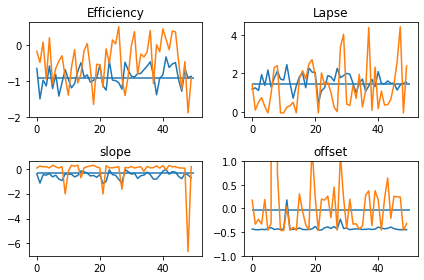

In [54]:
qpos = [np.where(Qdistance == np.min(Qdistance))[0][0],
       np.where(Qdistance == np.min(Qdistance))[1][0]]
# qpos = [9,1]
# expeff, expl, expo, exps
# efnQ = efn[:11,:,:]
# lfnQ = ln[:11,:,:]
# sfnQ = sn[:11,:,:]
# ofnQ
ibpos = [np.where(IBdistance == np.min(IBdistance))[0][0],
        np.where(IBdistance == np.min(IBdistance))[1][0]]
print('qpos = ', qpos, '. ibpos =', ibpos)
plt.subplot(221)
plt.plot(efnQ[qpos[0], qpos[1]])
plt.plot(efnQ[8,1])
# plt.plot(sim_obj['IBeff_arr'][ibpos[0], ibpos[1]])
plt.title('Efficiency')
plt.hlines(expeff, 0, 50)

plt.subplot(222)
plt.plot(lfnQ[qpos[0], qpos[1]])
plt.plot(lfnQ[8,1])
# plt.plot(sim_obj['IBlapse_arr'][ibpos[0], ibpos[1]])
plt.title('Lapse')
plt.hlines(expl, 0, 50)


plt.subplot(223)
plt.plot(sfnQ[qpos[0], qpos[1]])
plt.plot(sfnQ[8,1])
# plt.plot(sim_obj['IBslope_arr'][ibpos[0], ibpos[1]])
plt.title('slope')
plt.hlines(exps, 0, 50)


plt.subplot(224)
plt.plot(ofnQ[qpos[0], qpos[1]])
plt.plot(ofnQ[8,1])
plt.ylim([-1,1])
# plt.plot(sim_obj['IBoffset_arr'][ibpos[0], ibpos[1]])
plt.title('offset')
plt.hlines(expo, 0, 50)

plt.tight_layout()

In [55]:
expo

-0.03526407976112727

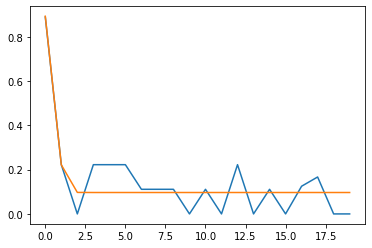

In [13]:
xvals = np.arange(20)
p = pR
ypred = p[2] + (1 - 2 * p[2]) * 1 / (1 + np.exp(-p[0] * (xvals + p[1])))
plt.plot(np.nanmean(arr[1::2, :], axis=0))
plt.plot(xvals, ypred)